In [245]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.linear_model import Ridge, Lasso
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
import joblib
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions

In [246]:
data = pd.read_csv('data.csv')

In [247]:
data.dtypes

feature_1     float64
feature_2     float64
feature_3     float64
feature_4     float64
feature_5     float64
feature_6     float64
category_1     object
category_2     object
category_3     object
y             float64
dtype: object

# Part 1
Your goal is to train models to predict the variable 'y' from the other variables using k-nearest neighbors, decision trees, and linear regression (including ridge and lasso regularization). For each type of model, do some testing to find a good choice of hyperparameters (e.g., number of neighbors, max depth, alpha, ...).  In addition to training the models, investigate the importance of features in predicting 'y'. Which three features are the most important according to your analysis?

For each type of model, save your best trained model and submit it with your notebook. Also save any scalers that you used before training and submit those as well.
I will test the models with a test set that I set aside.

In [249]:
data['category_1'].unique(), data['category_2'].unique(), data['category_3'].unique()

(array(['B', 'C', 'A'], dtype=object),
 array(['W', 'X', 'Z', 'Y'], dtype=object),
 array(['S', 'P', 'T', 'Q', 'R'], dtype=object))

In [250]:
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,category_1,category_2,category_3,y
0,37.535880,41.869273,5.648865,157.594233,-64.245986,-0.523056,B,W,S,1961.857525
1,32.417387,33.728537,-2.655009,127.595584,-86.070416,-7.577475,C,X,P,1657.470877
2,29.413351,40.356833,2.215155,127.368732,-86.046745,-2.124383,C,X,T,1323.467939
3,55.368986,31.624669,5.434290,244.321391,-123.557200,61.622193,C,Z,S,1908.506398
4,47.217120,78.624547,-8.326514,185.356179,-109.548793,78.792236,C,Y,Q,5764.002663


In [251]:
data.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'category_1', 'category_2', 'category_3', 'y'],
      dtype='object')

In [252]:
X = data[['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'category_1', 'category_2', 'category_3']]
y = data['y']

In [253]:
y

0       1961.857525
1       1657.470877
2       1323.467939
3       1908.506398
4       5764.002663
           ...     
1045    3772.272768
1046    2519.782555
1047    2539.839253
1048    3447.896700
1049    2395.849306
Name: y, Length: 1050, dtype: float64

In [254]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=290)

# Dummy Variables and Ordinal Encoding

In [255]:
train_dummies = pd.get_dummies(X_train[['category_1', 'category_2', 'category_3']], dtype=int)
train_dummies

,category_1_A,category_1_B,category_1_C,category_2_W,category_2_X,category_2_Y,category_2_Z,category_3_P,category_3_Q,category_3_R,category_3_S,category_3_T
874,0,0,1,1,0,0,0,0,1,0,0,0
135,0,0,1,0,0,0,1,0,0,0,0,1
317,1,0,0,1,0,0,0,1,0,0,0,0
38,1,0,0,1,0,0,0,0,0,0,1,0
81,0,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
171,1,0,0,0,1,0,0,1,0,0,0,0
513,0,0,1,0,1,0,0,0,0,1,0,0
483,1,0,0,0,0,1,0,0,0,0,1,0
928,0,0,1,1,0,0,0,0,0,0,1,0


In [256]:
dummy_train = pd.concat([X_train[['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6']], train_dummies], axis=1)
dummy_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,category_1_A,category_1_B,category_1_C,category_2_W,category_2_X,category_2_Y,category_2_Z,category_3_P,category_3_Q,category_3_R,category_3_S,category_3_T
874,55.611211,80.306446,2.395239,221.947940,-96.078031,-6.832144,0,0,1,1,0,0,0,0,1,0,0,0
135,12.114672,39.580034,8.217141,71.707705,-37.106930,75.052449,0,0,1,0,0,0,1,0,0,0,0,1
317,38.632337,36.943315,1.101901,149.875345,-104.128944,-15.484974,1,0,0,1,0,0,0,1,0,0,0,0
38,47.154739,53.447123,7.533552,168.696164,-134.402988,40.387954,1,0,0,1,0,0,0,0,0,0,1,0
81,37.201057,74.459690,8.796488,154.160918,-54.242424,79.764319,0,1,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,28.792644,53.684191,7.894330,102.933420,-73.378205,72.660626,1,0,0,0,1,0,0,1,0,0,0,0
513,46.910117,60.878834,9.278002,174.027013,-128.107138,56.371508,0,0,1,0,1,0,0,0,0,1,0,0
483,48.086331,48.815821,5.209471,195.397280,-85.672682,26.047453,1,0,0,0,0,1,0,0,0,0,1,0
928,39.974396,28.856287,-2.816982,183.380445,-61.034069,-12.113889,0,0,1,1,0,0,0,0,0,0,1,0


In [257]:
test_dummies = pd.get_dummies(X_test[['category_1', 'category_2', 'category_3']], dtype=int)
dummy_test = pd.concat([X_test[['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6']], test_dummies], axis=1)
dummy_test

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,category_1_A,category_1_B,category_1_C,category_2_W,category_2_X,category_2_Y,category_2_Z,category_3_P,category_3_Q,category_3_R,category_3_S,category_3_T
257,66.652214,83.254406,5.154378,255.993816,-124.812575,14.459860,0,1,0,1,0,0,0,0,1,0,0,0
903,51.184217,62.359187,3.175676,223.913645,-120.932181,-5.938565,0,1,0,0,0,1,0,0,1,0,0,0
243,55.392048,65.369381,4.698823,234.554518,-94.477309,40.077318,0,1,0,0,0,1,0,0,0,1,0,0
647,47.252005,75.890542,-3.748537,188.193597,-126.084397,17.668109,1,0,0,0,0,1,0,0,0,0,1,0
461,36.612446,57.093198,2.038639,146.978737,-74.506903,36.409959,0,1,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,51.393209,75.754761,-3.970933,208.738098,-145.867049,-8.642151,0,1,0,0,0,1,0,0,0,0,0,1
433,64.590865,37.437941,-3.400013,269.126593,-146.686337,9.895529,0,0,1,0,1,0,0,1,0,0,0,0
123,60.033350,29.173198,-13.223283,219.105635,-150.577973,168.768706,0,0,1,1,0,0,0,1,0,0,0,0
465,46.935754,64.581958,12.222408,184.428471,-102.427214,126.662920,0,0,1,0,0,1,0,0,1,0,0,0


In [258]:
ordinal_train = pd.DataFrame()
ordinal_train['feature_1'] = X_train['feature_1']
ordinal_train['feature_2'] = X_train['feature_2']
ordinal_train['feature_3'] = X_train['feature_3']
ordinal_train['feature_4'] = X_train['feature_4']
ordinal_train['feature_5'] = X_train['feature_5']
ordinal_train['feature_6'] = X_train['feature_6']
ordinal_train['C1_Code'] = X_train['category_1'].map({'A':0,'B':1, 'C':2})
ordinal_train['C2_Code'] = X_train['category_2'].map({'W':0,'X':1, 'Y':2, 'Z':3})
ordinal_train['C3_Code'] = X_train['category_3'].map({'P':0,'Q':1, 'R':2, 'S':3, 'T':4})
ordinal_train

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,C1_Code,C2_Code,C3_Code
874,55.611211,80.306446,2.395239,221.947940,-96.078031,-6.832144,2,0,1
135,12.114672,39.580034,8.217141,71.707705,-37.106930,75.052449,2,3,4
317,38.632337,36.943315,1.101901,149.875345,-104.128944,-15.484974,0,0,0
38,47.154739,53.447123,7.533552,168.696164,-134.402988,40.387954,0,0,3
81,37.201057,74.459690,8.796488,154.160918,-54.242424,79.764319,1,0,3
...,...,...,...,...,...,...,...,...,...
171,28.792644,53.684191,7.894330,102.933420,-73.378205,72.660626,0,1,0
513,46.910117,60.878834,9.278002,174.027013,-128.107138,56.371508,2,1,2
483,48.086331,48.815821,5.209471,195.397280,-85.672682,26.047453,0,2,3
928,39.974396,28.856287,-2.816982,183.380445,-61.034069,-12.113889,2,0,3


In [259]:
ordinal_test = pd.DataFrame()
ordinal_test['feature_1'] = X_test['feature_1']
ordinal_test['feature_2'] = X_test['feature_2']
ordinal_test['feature_3'] = X_test['feature_3']
ordinal_test['feature_4'] = X_test['feature_4']
ordinal_test['feature_5'] = X_test['feature_5']
ordinal_test['feature_6'] = X_test['feature_6']
ordinal_test['C1_Code'] = X_test['category_1'].map({'A':0,'B':1, 'C':2})
ordinal_test['C2_Code'] = X_test['category_2'].map({'W':0,'X':1, 'Y':2, 'Z':3})
ordinal_test['C3_Code'] = X_test['category_3'].map({'P':0,'Q':1, 'R':2, 'S':3, 'T':4})
ordinal_test

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,C1_Code,C2_Code,C3_Code
257,66.652214,83.254406,5.154378,255.993816,-124.812575,14.459860,1,0,1
903,51.184217,62.359187,3.175676,223.913645,-120.932181,-5.938565,1,2,1
243,55.392048,65.369381,4.698823,234.554518,-94.477309,40.077318,1,2,2
647,47.252005,75.890542,-3.748537,188.193597,-126.084397,17.668109,0,2,3
461,36.612446,57.093198,2.038639,146.978737,-74.506903,36.409959,1,0,1
...,...,...,...,...,...,...,...,...,...
710,51.393209,75.754761,-3.970933,208.738098,-145.867049,-8.642151,1,2,4
433,64.590865,37.437941,-3.400013,269.126593,-146.686337,9.895529,2,1,0
123,60.033350,29.173198,-13.223283,219.105635,-150.577973,168.768706,2,0,0
465,46.935754,64.581958,12.222408,184.428471,-102.427214,126.662920,2,2,1


List of dataframes I am now using for training
1. (dummy_train, dummy_test), (ordinal_train,ordinal_test)

2. (y_train, y_test)

# Scaling Dataframes

In [260]:
#scaling dummy dataframes
scaler = StandardScaler()
feature_columns = ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6']
dummy_scaled_train = dummy_train.copy()
dummy_scaled_test = dummy_test.copy()

dummy_scaled_train[feature_columns] = scaler.fit_transform(dummy_scaled_train[feature_columns])
dummy_scaled_test[feature_columns] = scaler.transform(dummy_scaled_test[feature_columns])

In [261]:
#scaling ordinal dataframes
ordinal_scaled_train = ordinal_train.copy()
ordinal_scaled_test = ordinal_test.copy()

ordinal_scaled_train[feature_columns] = scaler.fit_transform(ordinal_scaled_train[feature_columns])
ordinal_scaled_test[feature_columns] = scaler.transform(ordinal_scaled_test[feature_columns])

# KNN Model Training

In [262]:
knn=KNeighborsRegressor()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

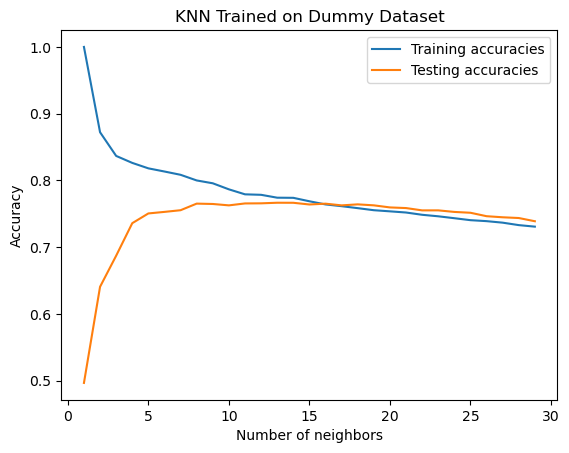

In [263]:
train_accuracies = {}
test_accuracies = {}
neighbors = range(1,30)
for n in neighbors:
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(dummy_scaled_train, y_train)
    train_accuracies[n] = knn.score(dummy_scaled_train, y_train)
    test_accuracies[n] = knn.score(dummy_scaled_test, y_test)

fig, ax = plt.subplots()
ax.plot(neighbors, train_accuracies.values(), label='Training accuracies')
ax.plot(neighbors, test_accuracies.values(), label='Testing accuracies')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Trained on Dummy Dataset')
plt.legend()
plt.show()

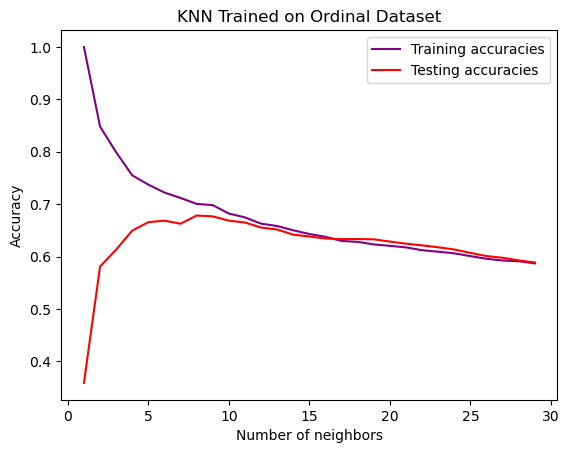

In [264]:
train_accuracies = {}
test_accuracies = {}
neighbors = range(1,30)
for n in neighbors:
    knn = KNeighborsRegressor(n_neighbors = n)
    knn.fit(ordinal_scaled_train, y_train)
    train_accuracies[n] = knn.score(ordinal_scaled_train, y_train)
    test_accuracies[n] = knn.score(ordinal_scaled_test, y_test)

fig, ax = plt.subplots()
ax.plot(neighbors, train_accuracies.values(), label='Training accuracies', color='purple')
ax.plot(neighbors, test_accuracies.values(), label='Testing accuracies', color='red')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('KNN Trained on Ordinal Dataset')
plt.legend()

plt.show()

In [265]:
knn = KNeighborsRegressor(n_neighbors = 8)

In [266]:
knn.fit(dummy_scaled_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [267]:
knn.score(dummy_scaled_train, y_train)

0.7998943480495453

In [268]:
knn.score(dummy_scaled_test, y_test)

0.7651501347173026

In [269]:
knn = KNeighborsRegressor(n_neighbors = 8)

In [270]:
knn.fit(ordinal_scaled_train, y_train)

KNeighborsRegressor(n_neighbors=8)

In [271]:
knn.score(ordinal_scaled_train, y_train)

0.7004346093481308

In [272]:
knn.score(ordinal_scaled_test, y_test)

0.6781891780981397

For the knn neighbors model, using the one-hot encoding or dummy variables performed better than the ordinal encoding but both ways of encoding had their best results when having n_neighbors=8. 

# Decision Tree Model Training

dummy_train, dummy_test, odrinal_train, ordinal_test

In [273]:
dt = DecisionTreeRegressor(random_state=290)

In [274]:
dt.fit(dummy_train, y_train)

DecisionTreeRegressor(random_state=290)

In [275]:
dt.score(dummy_train, y_train)

1.0

In [276]:
dt.score(dummy_test, y_test)

0.73585100837374

In [277]:
dt.get_depth()

17

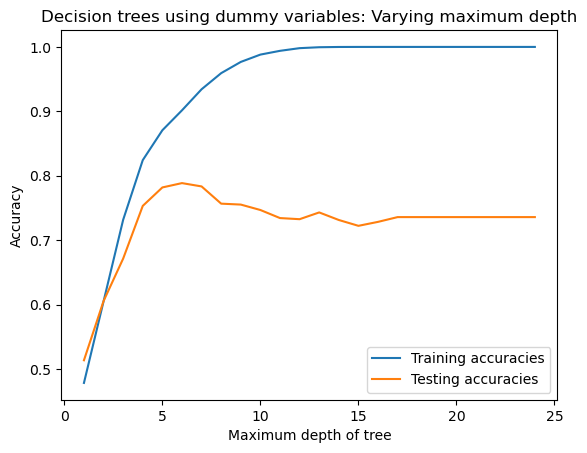

In [278]:
train_accuracies = {}
test_accuracies = {}
depth = range(1,25)
for n in depth:
    clf = DecisionTreeRegressor(max_depth = n, random_state=290)
    clf.fit(dummy_train, y_train)
    train_accuracies[n] = clf.score(dummy_train, y_train)
    test_accuracies[n] = clf.score(dummy_test, y_test)


fig, ax = plt.subplots()
ax.plot(depth, train_accuracies.values(), 
        label='Training accuracies')
ax.plot(depth, test_accuracies.values(), 
        label='Testing accuracies')
plt.xlabel('Maximum depth of tree')
plt.ylabel('Accuracy')
plt.title('Decision trees using dummy variables: Varying maximum depth')
plt.legend()
plt.show()

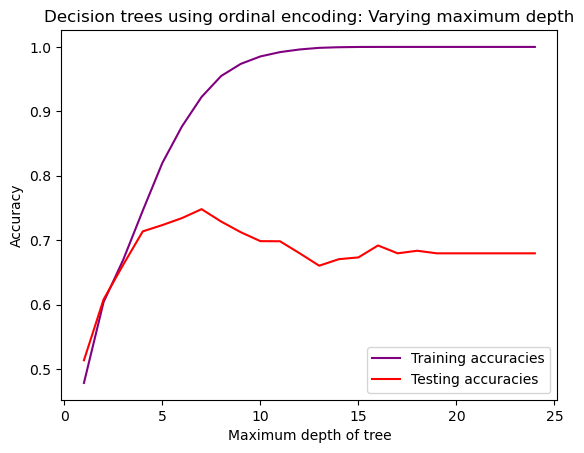

In [279]:
train_accuracies = {}
test_accuracies = {}
depth = range(1,25)
for n in depth:
    clf = DecisionTreeRegressor(max_depth = n, random_state=290)
    clf.fit(ordinal_train, y_train)
    train_accuracies[n] = clf.score(ordinal_train, y_train)
    test_accuracies[n] = clf.score(ordinal_test, y_test)


fig, ax = plt.subplots()
ax.plot(depth, train_accuracies.values(), 
        label='Training accuracies', color='purple')
ax.plot(depth, test_accuracies.values(), 
        label='Testing accuracies', color='red')
plt.xlabel('Maximum depth of tree')
plt.ylabel('Accuracy')
plt.title('Decision trees using ordinal encoding: Varying maximum depth')
plt.legend()
plt.show()

In [280]:
dt = DecisionTreeRegressor(max_depth = 6, random_state=290)
dt.fit(dummy_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=290)

In [281]:
dt.score(dummy_train, y_train)

0.9015651957316326

In [282]:
dt.score(dummy_test, y_test)

0.7886117545885732

In [283]:
feat_imp = pd.DataFrame(dummy_train.columns, columns=['feature'])
feat_imp['importance'] = dt.feature_importances_
feat_imp = feat_imp.sort_values(by='importance', ascending=False)
dummy_imp = feat_imp
dummy_imp

,feature,importance
1,feature_2,0.724348
7,category_1_B,0.136898
11,category_2_Y,0.098031
10,category_2_X,0.011262
2,feature_3,0.008878
9,category_2_W,0.005302
5,feature_6,0.003291
0,feature_1,0.002687
6,category_1_A,0.002240
13,category_3_P,0.001720


In [284]:
dt = DecisionTreeRegressor(max_depth = 7, random_state=290)
dt.fit(ordinal_train, y_train)

DecisionTreeRegressor(max_depth=7, random_state=290)

In [285]:
dt.score(ordinal_train, y_train)

0.9223459415873518

In [286]:
dt.score(ordinal_test, y_test)

0.7481811826655792

In [287]:
feat_imp = pd.DataFrame(ordinal_train.columns, columns=['feature'])
feat_imp['importance'] = dt.feature_importances_
feat_imp = feat_imp.sort_values(by='importance', ascending=False)
ordinal_imp = feat_imp
ordinal_imp

,feature,importance
1,feature_2,0.711996
6,C1_Code,0.134456
7,C2_Code,0.088071
2,feature_3,0.019025
5,feature_6,0.012138
8,C3_Code,0.009314
4,feature_5,0.009162
3,feature_4,0.008517
0,feature_1,0.007320


In [288]:
dt = DecisionTreeRegressor(max_depth = 6, random_state=290)
dt.fit(dummy_train[['feature_2', 'category_1_B', 'category_2_Y' ]], y_train)

DecisionTreeRegressor(max_depth=6, random_state=290)

In [289]:
dt.score(dummy_train[['feature_2', 'category_1_B', 'category_2_Y' ]], y_train)

0.8845186598226715

In [290]:
dt.score(dummy_test[['feature_2', 'category_1_B', 'category_2_Y' ]], y_test)

0.7815015637808752

In [291]:
dt = DecisionTreeRegressor(max_depth = 7, random_state=290)
dt.fit(ordinal_train[['feature_2', 'C1_Code', 'C2_Code' ]], y_train)

DecisionTreeRegressor(max_depth=7, random_state=290)

In [292]:
dt.score(ordinal_train[['feature_2', 'C1_Code', 'C2_Code' ]], y_train)

0.913426707069727

In [293]:
dt.score(ordinal_test[['feature_2', 'C1_Code', 'C2_Code' ]], y_test)

0.7736967543542377

For the decision trees model, the dummy variable encoding performed better than the ordinal encoding when using all of the features. I tried using the top 2 and 3 most important features and also tried different max depths for the trees. The best results I got for the dummy dataset was using the top 3 features with max_depth=6, but the score still ended up being worse than having all of the features/columns. For the ordinal encoded dataset, the score improved and got the best results with max_depth=7 and using the top 3 importance features. 

# Linear Regression Model Training

In [294]:
lin = LinearRegression()
lin.fit(dummy_scaled_train, y_train)
print(lin.score(dummy_scaled_train, y_train))
print(lin.score(dummy_scaled_test, y_test))
print('Coefficient:', lin.coef_)
print('Coeff. average:', lin.coef_.mean())
print('Intercept:', lin.intercept_)
print('RMSE:', np.sqrt(mse(y_test, lin.predict(dummy_scaled_test))))

0.8862316713407419
0.8768125083469899
Coefficient: [  72.16906949  941.11564398  -95.70525585  -22.81513504  -13.40797076
   50.20724409  401.29789393 -551.0014174   149.70352347   14.62730985
 -435.08390159  578.29690536 -157.84031362  -37.42821226   12.02854149
  -23.2409248    17.39188771   31.24870785]
Coeff. average: 51.75353310516239
Intercept: 2887.0313716063392
RMSE: 387.43676463144647


In [295]:
print(dummy_scaled_train.mean(axis=0))  # Should be ~0
print(dummy_scaled_train.std(axis=0))

feature_1       5.752013e-16
feature_2      -7.250436e-18
feature_3      -3.866899e-17
feature_4      -5.316986e-16
feature_5       2.561821e-16
feature_6       3.504377e-17
category_1_A    3.292517e-01
category_1_B    3.210884e-01
category_1_C    3.496599e-01
category_2_W    2.312925e-01
category_2_X    2.408163e-01
category_2_Y    2.544218e-01
category_2_Z    2.734694e-01
category_3_P    1.891156e-01
category_3_Q    2.367347e-01
category_3_R    1.836735e-01
category_3_S    2.027211e-01
category_3_T    1.877551e-01
dtype: float64
feature_1       1.000681
feature_2       1.000681
feature_3       1.000681
feature_4       1.000681
feature_5       1.000681
feature_6       1.000681
category_1_A    0.470262
category_1_B    0.467213
category_1_C    0.477187
category_2_W    0.421946
category_2_X    0.427870
category_2_Y    0.435832
category_2_Z    0.446043
category_3_P    0.391867
category_3_Q    0.425368
category_3_R    0.387481
category_3_S    0.402300
category_3_T    0.390782
dtype: float6

In [296]:
train_scores = {}
test_scores = {}
train_rmse = {}
test_rmse = {}
ave_coef = {}
alphas = np.linspace(0.001, 40.0, 500) 
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(dummy_scaled_train, y_train)
    train_scores[a] = ridge.score(dummy_scaled_train, y_train)
    test_scores[a] = ridge.score(dummy_scaled_test, y_test)
    train_rmse[a] = np.sqrt(mse(y_train, ridge.predict(dummy_scaled_train)))
    test_rmse[a] = np.sqrt(mse(y_test, ridge.predict(dummy_scaled_test)))
    ave_coef[a] = ridge.coef_.mean()

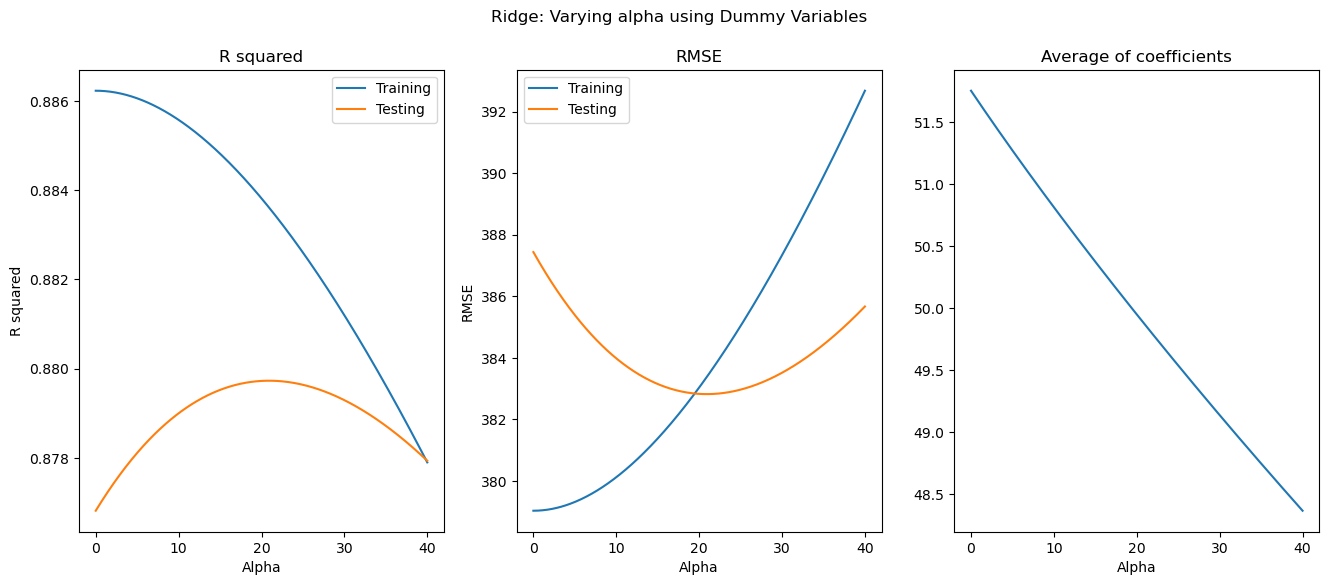

In [297]:
fig, ax = plt.subplots(1,3,figsize=(16,6))
ax[0].plot(alphas, train_scores.values(), label='Training') #Plot training accuracies
ax[0].plot(alphas, test_scores.values(), label='Testing')
ax[0].legend()
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('R squared')
ax[0].set_title('R squared')
ax[1].plot(alphas, train_rmse.values(), label='Training') #Plot training accuracies
ax[1].plot(alphas, test_rmse.values(), label='Testing')
ax[1].legend()
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('RMSE')
ax[1].set_title('RMSE')
ax[2].plot(alphas, ave_coef.values(), label='Average of coefs')
#ax[2].legend()
ax[2].set_xlabel('Alpha')
#ax[2].set_ylabel('Average')
ax[2].set_title('Average of coefficients')
plt.suptitle('Ridge: Varying alpha using Dummy Variables')
plt.tight_layout
plt.show()

In [298]:
train_scores = {}
test_scores = {}
train_rmse = {}
test_rmse = {}
ave_coef = {}
alphas = np.linspace(0.1, 10.0, 1000)
for a in alphas:
    lasso = Lasso(alpha=a, max_iter=5000)
    lasso.fit(dummy_scaled_train, y_train)
    train_scores[a] = lasso.score(dummy_scaled_train, y_train)
    test_scores[a] = lasso.score(dummy_scaled_test, y_test)
    train_rmse[a] = np.sqrt(mse(y_train, lasso.predict(dummy_scaled_train)))
    test_rmse[a] = np.sqrt(mse(y_test, lasso.predict(dummy_scaled_test)))
    ave_coef[a] = lasso.coef_.mean()

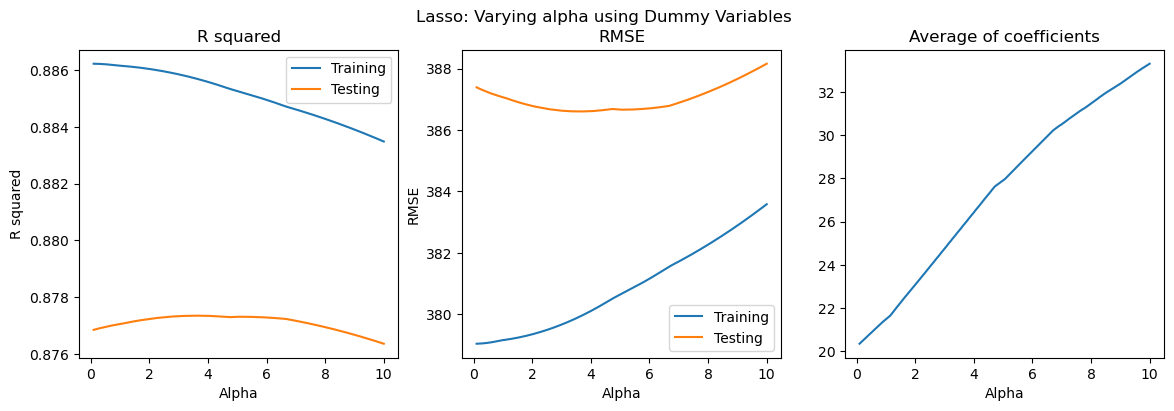

In [299]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(alphas, train_scores.values(), label='Training')
ax[0].plot(alphas, test_scores.values(), label='Testing')
ax[0].legend()
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('R squared')
ax[0].set_title('R squared')

ax[1].plot(alphas, train_rmse.values(), label='Training')
ax[1].plot(alphas, test_rmse.values(), label='Testing')
ax[1].legend()
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('RMSE')
ax[1].set_title('RMSE')

ax[2].plot(alphas, ave_coef.values(), label='Average of coefs')
ax[2].set_xlabel('Alpha')
ax[2].set_title('Average of coefficients')
plt.suptitle('Lasso: Varying alpha using Dummy Variables')
plt.tight_layout
plt.show()

In [300]:
train_scores = {}
test_scores = {}
train_rmse = {}
test_rmse = {}
ave_coef = {}
alphas = np.linspace(0.1, 100.0, 700) 
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(ordinal_scaled_train, y_train)
    train_scores[a] = ridge.score(ordinal_scaled_train, y_train)
    test_scores[a] = ridge.score(ordinal_scaled_test, y_test)
    train_rmse[a] = np.sqrt(mse(y_train, ridge.predict(ordinal_scaled_train)))
    test_rmse[a] = np.sqrt(mse(y_test, ridge.predict(ordinal_scaled_test)))
    ave_coef[a] = ridge.coef_.mean()

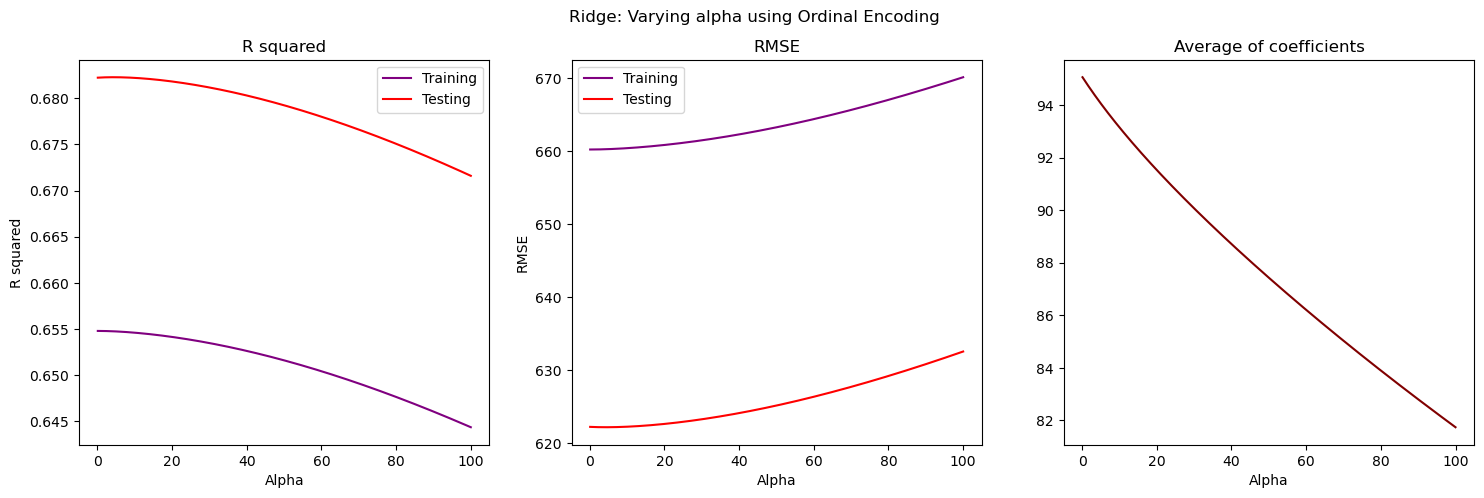

In [301]:
fig, ax = plt.subplots(1,3,figsize=(18,5))
ax[0].plot(alphas, train_scores.values(), label='Training', color='purple') #Plot training accuracies
ax[0].plot(alphas, test_scores.values(), label='Testing', color='red')
ax[0].legend()
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('R squared')
ax[0].set_title('R squared')
ax[1].plot(alphas, train_rmse.values(), label='Training', color='purple') #Plot training accuracies
ax[1].plot(alphas, test_rmse.values(), label='Testing', color='red')
ax[1].legend()
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('RMSE')
ax[1].set_title('RMSE')
ax[2].plot(alphas, ave_coef.values(), label='Average of coefs', color='maroon')
#ax[2].legend()
ax[2].set_xlabel('Alpha')
#ax[2].set_ylabel('Average')
ax[2].set_title('Average of coefficients')
plt.suptitle('Ridge: Varying alpha using Ordinal Encoding')
plt.tight_layout
plt.show()

In [302]:
train_scores = {}
test_scores = {}
train_rmse = {}
test_rmse = {}
ave_coef = {}
alphas = np.linspace(1, 150.0, 2000)
for a in alphas:
    lasso = Lasso(alpha=a, max_iter=5000)
    lasso.fit(ordinal_scaled_train, y_train)
    train_scores[a] = lasso.score(ordinal_scaled_train, y_train)
    test_scores[a] = lasso.score(ordinal_scaled_test, y_test)
    train_rmse[a] = np.sqrt(mse(y_train, lasso.predict(ordinal_scaled_train)))
    test_rmse[a] = np.sqrt(mse(y_test, lasso.predict(ordinal_scaled_test)))
    ave_coef[a] = lasso.coef_.mean()

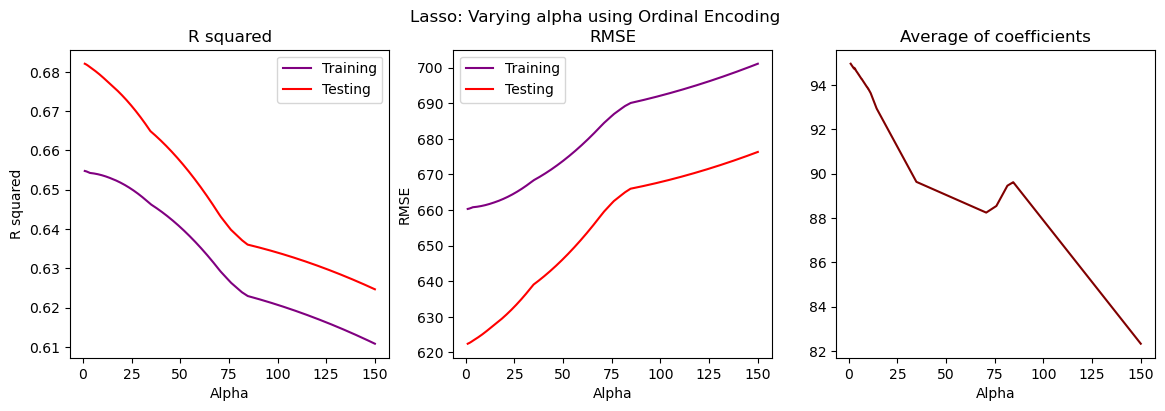

In [303]:
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(alphas, train_scores.values(), label='Training', color='purple')
ax[0].plot(alphas, test_scores.values(), label='Testing', color='red')
ax[0].legend()
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('R squared')
ax[0].set_title('R squared')
ax[1].plot(alphas, train_rmse.values(), label='Training', color='purple')
ax[1].plot(alphas, test_rmse.values(), label='Testing', color='red')
ax[1].legend()
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('RMSE')
ax[1].set_title('RMSE')
ax[2].plot(alphas, ave_coef.values(), label='Average of coefs', color='maroon')
#ax[2].legend()
ax[2].set_xlabel('Alpha')
#ax[2].set_ylabel('Average')
ax[2].set_title('Average of coefficients')
plt.suptitle('Lasso: Varying alpha using Ordinal Encoding')
plt.tight_layout
plt.show()




Overall for this dataset, I got the best results using linear regression with dummy variable encoding using lasso regularization at alpha=3





# Part 2
Use linear regression (including regularization if you want) to predict 'mpg' from the other variables (except for 'name') in the mpg dataset available through seaborn. Split off a test set and see what kind of performance (evaluating with $r^2$ and RMSE) you can achieve using linear regression for this problem. 

In [304]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


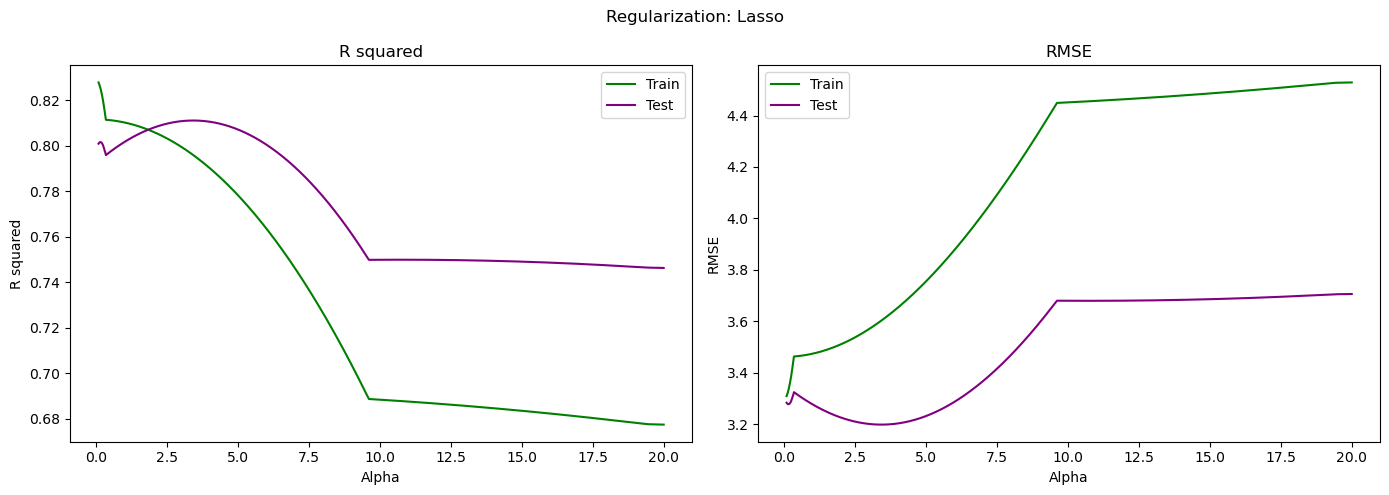

In [305]:
mpg = sns.load_dataset('mpg')
mpg = pd.get_dummies(mpg, columns=['origin'], dtype=int)

mpg['horsepower'] = pd.to_numeric(mpg['horsepower'])
mpg = mpg.dropna()

X = mpg[['cylinders', 'displacement', 'horsepower', 'weight',
         'acceleration', 'model_year', 'origin_europe', 'origin_japan',
         'origin_usa']]
y = mpg['mpg']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=290)


train_scores = {}
test_scores = {}
train_rmse = {}
test_rmse = {}
ave_coef = {}

alphas = np.linspace(0.1, 20.0, 1000)


for a in alphas:
    lasso = Lasso(alpha=a, max_iter=10000)
    lasso.fit(X_train, y_train)
    train_scores[a] = lasso.score(X_train, y_train)
    test_scores[a] = lasso.score(X_test, y_test)
    train_rmse[a] = np.sqrt(mse(y_train, lasso.predict(X_train)))
    test_rmse[a] = np.sqrt(mse(y_test, lasso.predict(X_test)))
    ave_coef[a] = np.mean(lasso.coef_)


fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(alphas, train_scores.values(), label="Train", color='green')
ax[0].plot(alphas, test_scores.values(), label="Test", color='purple')
ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('R squared')
ax[0].set_title('R squared')
ax[0].legend()

ax[1].plot(alphas, train_rmse.values(), label="Train", color='green')
ax[1].plot(alphas, test_rmse.values(), label="Test", color='purple')
ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('RMSE')
ax[1].set_title('RMSE')
ax[1].legend()

plt.suptitle('Regularization: Lasso')
plt.tight_layout()
plt.show()



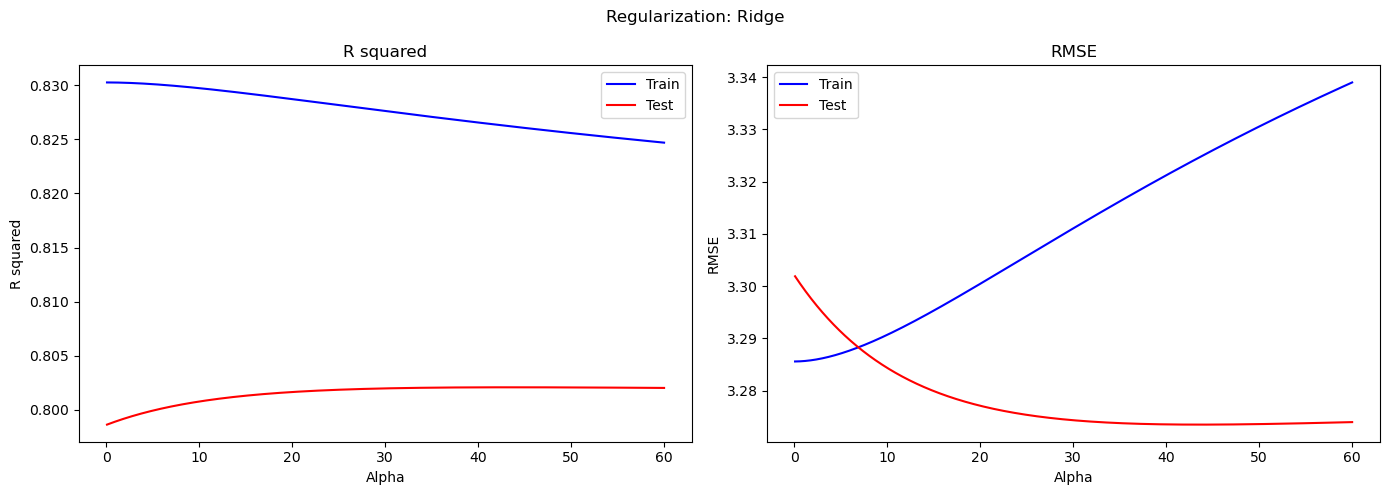

In [306]:
train_scores = {}
test_scores = {}
train_rmse = {}
test_rmse = {}
ave_coef = {}
alphas = np.linspace(0.1, 60.0, 1000) 

for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    train_scores[a] = ridge.score(X_train, y_train)
    test_scores[a] = ridge.score(X_test, y_test)
    train_rmse[a] = np.sqrt(mse(y_train, ridge.predict(X_train)))
    test_rmse[a] = np.sqrt(mse(y_test, ridge.predict(X_test)))
    ave_coef[a] = ridge.coef_.mean()


fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].plot(alphas, train_scores.values(), label="Train", color='blue')
ax[0].plot(alphas, test_scores.values(), label="Test", color='red')

ax[0].set_xlabel('Alpha')
ax[0].set_ylabel('R squared')
ax[0].set_title('R squared')
ax[0].legend()

ax[1].plot(alphas, train_rmse.values(), label="Train", color='blue')
ax[1].plot(alphas, test_rmse.values(), label="Test", color='red')

ax[1].set_xlabel('Alpha')
ax[1].set_ylabel('RMSE')
ax[1].set_title('RMSE')
ax[1].legend()

plt.suptitle('Regularization: Ridge')
plt.tight_layout()
plt.show()

In [307]:
lin = LinearRegression()
lin.fit(X_train, y_train)
print('Train Score:', lin.score(X_train, y_train))
print('Test Score:', lin.score(X_test, y_test))
print('Coefficient:', lin.coef_)
print('Coeff. average:', lin.coef_.mean())
print('Intercept:', lin.intercept_)
print('RMSE:', np.sqrt(mse(y_test, lin.predict(X_test))))

Train Score: 0.8302552737739745
Test Score: 0.7986083593681657
Coefficient: [-0.46403012  0.02186008 -0.01215152 -0.00637729  0.1331488   0.87020749
  0.85814864  1.16813465 -2.02628329]
Coeff. average: 0.06029527000436419
Intercept: -25.29051432816105
RMSE: 3.3021472822643183


For the mpg dataset the best algorithm to predict mpg was using linear regression with ridge regularization at alpha=40